In [21]:
import numpy as np
from keras.datasets import fashion_mnist 
from keras import Model
from keras.layers import Input, Dense
from keras.optimizers import SGD, Adam

import keras

import matplotlib.pyplot as plt
%matplotlib inline

## Loading data

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [4]:
batch_size = 128
num_classes = 10
epochs = 20

In [5]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Visualization

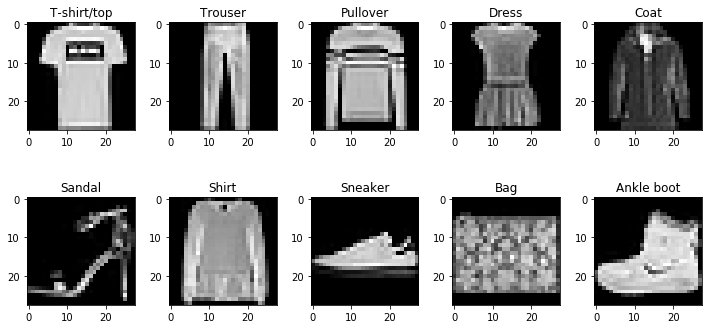

In [54]:
labels  = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

f, axs = plt.subplots(2,5, figsize=(10, 5))

for i, (ax, label) in enumerate(zip(axs.ravel(), labels)):
    ind = np.argmax(y_train[:, i]==1)
    img = x_train[ind].reshape((28, 28))
    ax.imshow(img, cmap='gray')
    ax.set_title(label)

f.tight_layout()

## Logreg model

In [19]:
inputs = Input(shape=(784,))
outputs = Dense(num_classes, activation='sigmoid')(inputs)

model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=epochs, batch_size=batch_size)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.5579 - acc: 0.8072 - val_loss: 0.5130 - val_acc: 0.8271
Epoch 2/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.4680 - acc: 0.8400 - val_loss: 0.5145 - val_acc: 0.8301
Epoch 3/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.4437 - acc: 0.8490 - val_loss: 0.4782 - val_acc: 0.8394
Epoch 4/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.4444 - acc: 0.8483 - val_loss: 0.5122 - val_acc: 0.8298
Epoch 5/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.4327 - acc: 0.8522 - val_loss: 0.5162 - val_acc: 0.8243
Epoch 6/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.4372 - acc: 0.8524 - val_loss: 0.5096 - val_acc: 0.8365
Epoch 7/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.4337 - acc: 0.8535 - val_loss: 0.4806 - val_acc

## Multiple layers model

Do it yourself